In [1]:
#importing the required Libraries
import tensorflow as tf
import os
import numpy as np
from tqdm import tqdm 
from skimage.io import imread, imshow
from skimage.transform import resize
import matplotlib.pyplot as plt

In [2]:
import cv2
import pywt

In [3]:
seed = 42
np.random.seed = seed
#getting the dataset from files
IMG_WIDTH = 128
IMG_HEIGHT = 128
IMG_CHANNELS = 3

TRAIN_PATH = r'C:\Users\ummad\OneDrive\Documents\Internship_files\VIT_Summer\research\research\dataset\train\images'
MASK_PATH = r'C:\Users\ummad\OneDrive\Documents\Internship_files\VIT_Summer\research\research\dataset\train\labels'
TEST_PATH = r'C:\Users\ummad\OneDrive\Documents\Internship_files\VIT_Summer\research\research\dataset\validation\images'
MASK_PATH2 = r'C:\Users\ummad\OneDrive\Documents\Internship_files\VIT_Summer\research\research\dataset\validation\labels'

In [4]:

train_ids = next(os.walk(TRAIN_PATH))[2]
print(train_ids)
test_ids = next(os.walk(TEST_PATH))[2]
mask_ids=next(os.walk(MASK_PATH))[2]
mask_ids2=next(os.walk(MASK_PATH2))[2]
X_train = np.zeros((len(train_ids), IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)
Y_train = np.zeros((len(mask_ids), IMG_HEIGHT, IMG_WIDTH,1), dtype=np.bool_)


['0011.png', '0012.png', '0013.png', '0014.png', '0015.png', '0016.png', '0017.png', '0018.png', '0019.png', '0020.png', '0021.png', '0022.png', '0023.png', '0024.png', '0026.png', '0027.png', '0028.png', '0029.png', '0031.png', '0032.png', '0034.png', '0035.png', '0036.png', '0037.png', '0038.png', '0039.png', '0040.png', '0041.png', '0042.png', '0043.png', '0044.png', '0045.png', '0048.png', '0049.png', '0050.png', '0051.png', '0052.png', '0053.png', '0054.png', '0055.png', '0056.png', '0059.png', '0060.png', '0061.png', '0063.png', '0064.png', '0065.png', '0066.png', '0067.png', '0069.png', '0070.png', '0071.png', '0072.png', '0073.png', '0074.png', '0075.png', '0076.png', '0077.png', '0080.png', '0081.png', '0083.png', '0084.png', '0086.png', '0087.png', '0088.png', '0090.png', '0091.png', '0092.png', '0093.png', '0094.png', '0095.png', '0097.png', '0098.png', '0099.png', '0100.png', '0101.png', '0102.png', '0103.png', '0104.png', '0105.png', '0106.png', '0109.png', '0110.png', '01

In [8]:
#Appliying wavelet trasform to X_train images
#resizing the training imagaes and mask values to 128X128X3

print('Resizing training images and masks')
from tqdm import tqdm 
for n, id_ in tqdm(enumerate(train_ids), total=len(train_ids)):    
    path = TRAIN_PATH 
    img = imread(path +'/'+ id_ ,cv2.IMREAD_GRAYSCALE) 
    
    coeffs_photo = pywt.wavedec2(img, 'db1', level=1)
    cA_photo, (cH_photo, cV_photo, cD_photo) = coeffs_photo
    cV_photo = resize(cV_photo, (IMG_HEIGHT, IMG_WIDTH,IMG_CHANNELS), mode='constant', preserve_range=True)
    X_train[n] = np.abs(cV_photo)  #Fill empty X_train with values from img
    path_mask=MASK_PATH
    mask = np.zeros((IMG_HEIGHT, IMG_WIDTH, 1), dtype=np.bool_)
    mask_ = imread(path_mask + '/' + id_ )
    mask_ = np.expand_dims(resize(mask_, (IMG_HEIGHT, IMG_WIDTH,1), mode='constant',  
                                preserve_range=True), axis=-1)
    mask_ = mask_.reshape((128, 128, 1))
    mask=mask_
    
    Y_train[n] = mask  

Resizing training images and masks


  0%|          | 0/810 [00:00<?, ?it/s]

100%|██████████| 810/810 [02:18<00:00,  5.84it/s]


In [9]:
#Appliying wavelet trasform to Y_train images
#resixing the training imagaes and mask values to 128X128X3
X_test = np.zeros((len(test_ids), IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)
Y_test = np.zeros((len(mask_ids2), IMG_HEIGHT, IMG_WIDTH,1), dtype=np.bool_)
sizes_test = []
print('Resizing test images') 
for n, id_ in tqdm(enumerate(test_ids), total=len(test_ids)):
    path = TEST_PATH 
    img = imread(path +'/'+ id_ ,cv2.IMREAD_GRAYSCALE)
    sizes_test.append([img.shape[0], img.shape[1]])
    img = resize(img, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)
    coeffs_photo = pywt.wavedec2(img, 'db1', level=1)
    cA_photo, (cH_photo, cV_photo, cD_photo) = coeffs_photo
    cV_photo = resize(cV_photo, (IMG_HEIGHT, IMG_WIDTH,IMG_CHANNELS), mode='constant', preserve_range=True)
    X_test[n] = np.abs(cV_photo)
    path_mask=MASK_PATH2
    mask = np.zeros((IMG_HEIGHT, IMG_WIDTH, 1), dtype=np.bool_)
    mask_ = imread(path_mask + '/' + id_ )
    mask_ = np.expand_dims(resize(mask_, (IMG_HEIGHT, IMG_WIDTH,1), mode='constant',  
                                preserve_range=True), axis=-1)
    mask_ = mask_.reshape((128, 128, 1))
    mask=mask_      
    Y_test[n] = mask  

print('Done!')

Resizing test images


100%|██████████| 200/200 [00:30<00:00,  6.56it/s]

Done!


In [10]:
import random

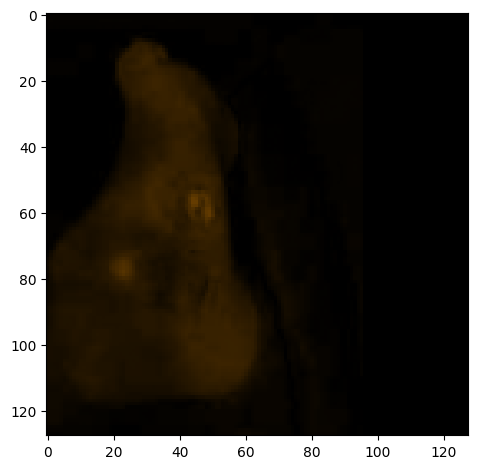

In [11]:
image_x = random.randint(0, len(train_ids))
imshow(X_train[image_x],cmap='gray')
plt.show()


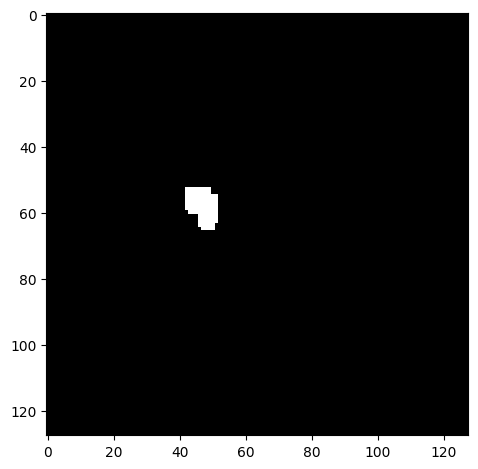

In [12]:
imshow(np.squeeze(Y_train[image_x]))
plt.show()

Unet++ deepLearning mode
#with adam optimizer and loss function combined loss(Binary Cross entropy and dice_Loss)

In [17]:
def dice_loss(y_true, y_pred):
    y_true = tf.cast(y_true, tf.float32)
    smooth = 1.
    intersection = tf.reduce_sum(y_true * y_pred)
    union = tf.reduce_sum(y_true) + tf.reduce_sum(y_pred)
    dice = (2. * intersection + smooth) / (union + smooth)
    return 1 - dice

def combined_loss(y_true, y_pred):
    bce = tf.keras.losses.binary_crossentropy(y_true, y_pred)
    dice = dice_loss(y_true, y_pred)
    return bce + dice




In [18]:
inputs = tf.keras.layers.Input((IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))
s = tf.keras.layers.Lambda(lambda x: x / 255)(inputs)

#Contraction path
c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(s)
c1 = tf.keras.layers.Dropout(0.1)(c1)
c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
p1 = tf.keras.layers.MaxPooling2D((2, 2))(c1)

c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
c2 = tf.keras.layers.Dropout(0.1)(c2)
c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
p2 = tf.keras.layers.MaxPooling2D((2, 2))(c2)
 
c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
c3 = tf.keras.layers.Dropout(0.2)(c3)
c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
p3 = tf.keras.layers.MaxPooling2D((2, 2))(c3)
 
c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
c4 = tf.keras.layers.Dropout(0.2)(c4)
c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
p4 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(c4)
 
c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p4)
c5 = tf.keras.layers.Dropout(0.3)(c5)
c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)

#Expansive path 
u6 = tf.keras.layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c5)
u6 = tf.keras.layers.concatenate([u6, c4])
c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
c6 = tf.keras.layers.Dropout(0.2)(c6)
c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)
 
u7 = tf.keras.layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c6)
u7 = tf.keras.layers.concatenate([u7, c3])
c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
c7 = tf.keras.layers.Dropout(0.2)(c7)
c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)
 
u8 = tf.keras.layers.Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c7)
u8 = tf.keras.layers.concatenate([u8, c2])
c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
c8 = tf.keras.layers.Dropout(0.1)(c8)
c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)
 
u9 = tf.keras.layers.Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c8)
u9 = tf.keras.layers.concatenate([u9, c1], axis=3)
c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
c9 = tf.keras.layers.Dropout(0.1)(c9)
c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)
 
outputs = tf.keras.layers.Conv2D(1, (1, 1), activation='sigmoid')(c9)
 
model = tf.keras.Model(inputs=[inputs], outputs=[outputs])
model.compile(optimizer='adam', loss=combined_loss, metrics=['accuracy'])
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda_1 (Lambda)   │ (None, 128, 128,  │          0 │ input_layer_1[0]… │
│                     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_19 (Conv2D)  │ (None, 128, 128,  │        448 │ lambda_1[0][0]    │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_9 (Dropout) │ (None, 128, 128,  │          0 │ conv2d_19[0][0]   │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_20 (Conv2D)  │ (None, 128, 128,  │      2,320 │ dropout_9[0][0]   │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_4     │ (None, 64, 64,    │          0 │ conv2d_20[0][0]   │
│ (MaxPooling2D)      │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_21 (Conv2D)  │ (None, 64, 64,    │      4,640 │ max_pooling2d_4[… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_10          │ (None, 64, 64,    │          0 │ conv2d_21[0][0]   │
│ (Dropout)           │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_22 (Conv2D)  │ (None, 64, 64,    │      9,248 │ dropout_10[0][0]  │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_5     │ (None, 32, 32,    │          0 │ conv2d_22[0][0]   │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_23 (Conv2D)  │ (None, 32, 32,    │     18,496 │ max_pooling2d_5[… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_11          │ (None, 32, 32,    │          0 │ conv2d_23[0][0]   │
│ (Dropout)           │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_24 (Conv2D)  │ (None, 32, 32,    │     36,928 │ dropout_11[0][0]  │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_6     │ (None, 16, 16,    │          0 │ conv2d_24[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_25 (Conv2D)  │ (None, 16, 16,    │     73,856 │ max_pooling2d_6[… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_12          │ (None, 16, 16,    │          0 │ conv2d_25[0][0]   │
│ (Dropout)           │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_26 (Conv2D)  │ (None, 16, 16,    │    147,584 │ dropout_12[0][0]

 Total params: 1,941,105 (7.40 MB)

 Trainable params: 1,941,105 (7.40 MB)

 Non-trainable params: 0 (0.00 B)

Training of model with validation split 0.1 , batch size 16, epochs 25.

In [19]:
history = model.fit(X_train, Y_train, validation_split=0.1, batch_size=16, epochs=25)

Epoch 1/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 33s 402ms/step - accuracy: 0.8058 - loss: 1.5061 - val_accuracy: 0.9756 - val_loss: 1.0239
Epoch 2/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 23s 493ms/step - accuracy: 0.9788 - loss: 0.9291 - val_accuracy: 0.9755 - val_loss: 0.8535
Epoch 3/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 22s 475ms/step - accuracy: 0.9687 - loss: 0.8125 - val_accuracy: 0.9774 - val_loss: 0.6285
Epoch 4/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 21s 450ms/step - accuracy: 0.9770 - loss: 0.6769 - val_accuracy: 0.9777 - val_loss: 0.5959
Epoch 5/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 22s 482ms/step - accuracy: 0.9823 - loss: 0.5404 - val_accuracy: 0.9811 - val_loss: 0.6091
Epoch 6/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 24s 534ms/step - accuracy: 0.9841 - loss: 0.4737 - val_accuracy: 0.9816 - val_loss: 0.5178
Epoch 7/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 41s 883ms/step - accuracy: 0.9847 - loss: 0.4613 - val_accuracy: 0.9822 - val_loss: 0.5354
Epoch 8/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 42s 904ms/step - accuracy: 0.9861 - loss: 0.4285 - val_accu

In [121]:
import torch

In [ ]:
#model is saved in function_model.h5 file
model.save('model1.h5')

In [ ]:
loaded_model = tf.keras.models.load_model('model1.h5')


Predictions of the model 

In [29]:
idx = random.randint(0, len(X_train))


preds_train = model.predict(X_train, verbose=1)
preds_val = model.predict(X_train[int(X_train.shape[0]*0.9):], verbose=1)
preds_test = model.predict(X_test, verbose=1)

 
preds_train_t = (preds_train > 0.5).astype(np.uint8)
preds_val_t = (preds_val > 0.5).astype(np.uint8)
preds_test_t = (preds_test > 0.5).astype(np.uint8)


26/26 ━━━━━━━━━━━━━━━━━━━━ 5s 198ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 169ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 198ms/step


In [30]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score
import tensorflow as tf
y_pred = model.predict(X_train)
y_pred_binary = (y_pred > 0.5).astype(np.uint8)

# Flatten the arrays for metric calculations
y_val_flat = Y_train.flatten()
y_pred_flat = y_pred_binary.flatten()

precision = precision_score(y_val_flat, y_pred_flat)
recall = recall_score(y_val_flat, y_pred_flat)
iou = np.sum(np.logical_and(y_val_flat, y_pred_flat)) / np.sum(np.logical_or(y_val_flat, y_pred_flat))
dice = f1_score(y_val_flat, y_pred_flat)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"IoU: {iou}")
print(f"Dice Score: {dice}")


26/26 ━━━━━━━━━━━━━━━━━━━━ 5s 209ms/step
Precision: 0.863423332249009
Recall: 0.7623260349259817
IoU: 0.6802928808067512
Dice Score: 0.8097313136030492


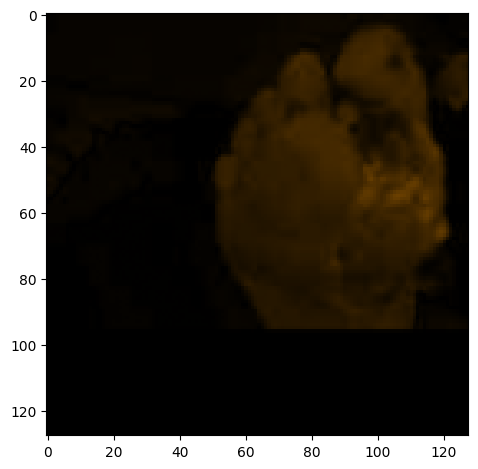

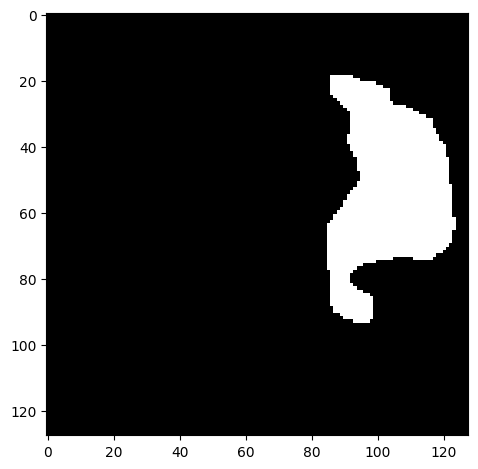

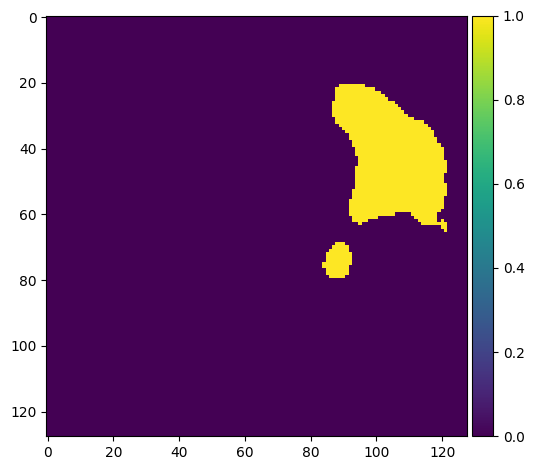

In [129]:
ix = random.randint(0, len(preds_train_t))
imshow(X_train[ix])
plt.show()
imshow(np.squeeze(Y_train[ix]))
plt.show()
imshow(np.squeeze(preds_train_t[ix]))
plt.show()

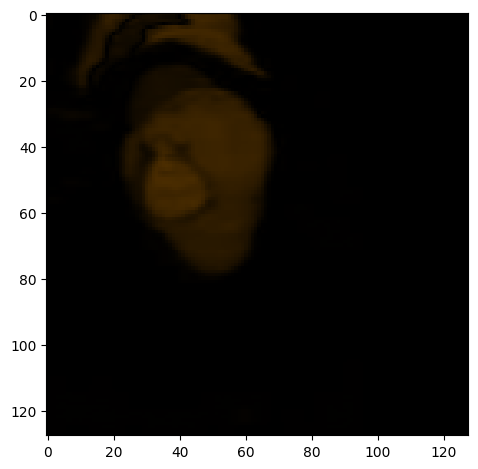

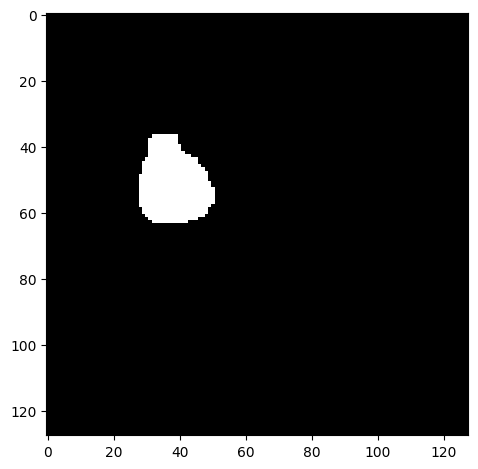

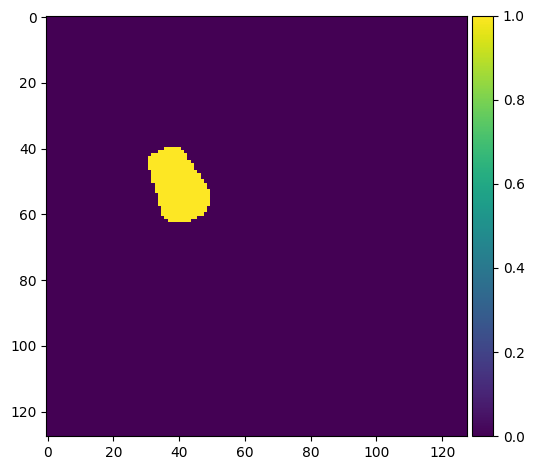

In [32]:
ix = random.randint(0, len(preds_test_t))
imshow(X_test[ix])
plt.show()
imshow(np.squeeze(Y_test[ix]))
plt.show()
imshow(np.squeeze(preds_test_t[ix]))
plt.show()

Accuracy curve and Loss curve for the Unet++ model

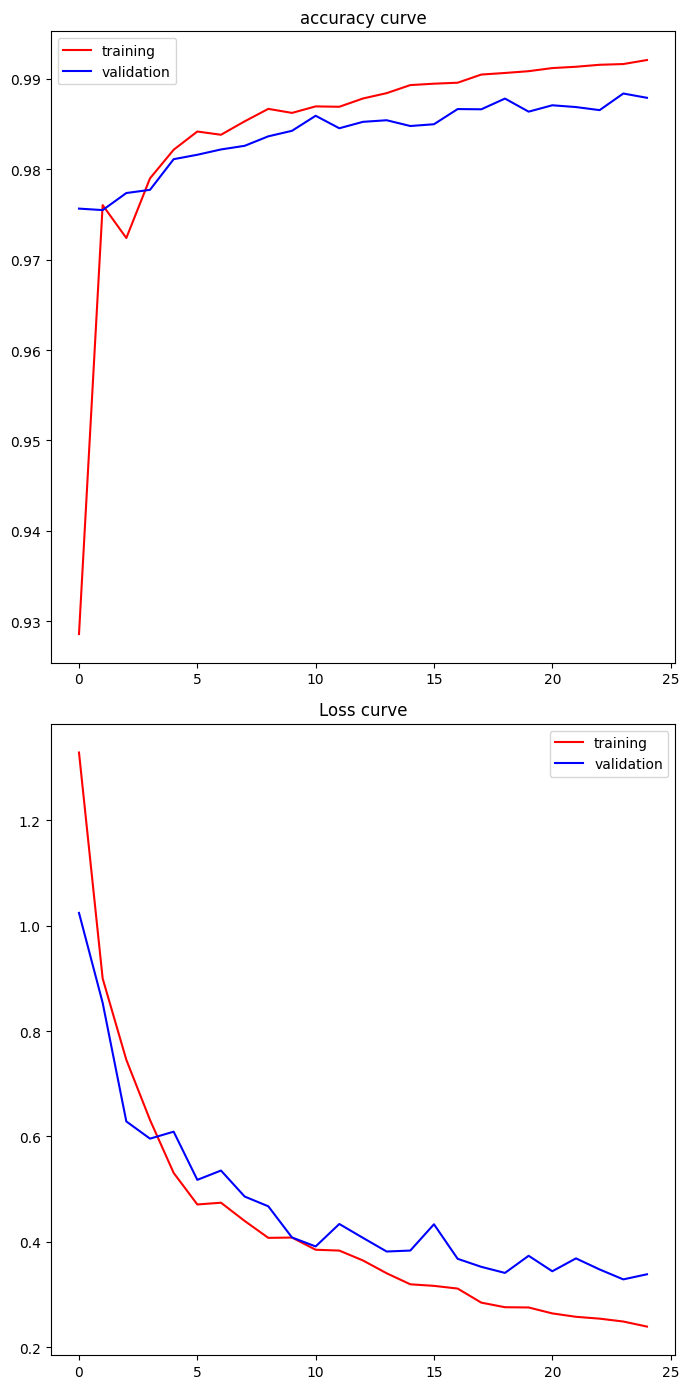

In [36]:
fig, ax = plt.subplots(2,1, figsize=(7, 14))

ax[0].plot(history.history['accuracy'], 'r')
ax[0].plot(history.history['val_accuracy'], 'b')
ax[0].set_title('accuracy curve')
ax[0].legend(['training', 'validation'])

ax[1].plot(history.history['loss'], 'r')
ax[1].plot(history.history['val_loss'], 'b')
ax[1].set_title('Loss curve')
ax[1].legend(['training', 'validation'])

fig.tight_layout()

# plt.show()

Segnet model 

In [37]:
convnet_input = tf.keras.layers.Input((IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))
s = tf.keras.layers.Lambda(lambda x: x / 255)(convnet_input)

encoder_conv1 = tf.keras.layers.Conv2D(16, kernel_size=9, activation='relu', padding='same')(convnet_input)
pool1 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(encoder_conv1)
encoder_conv2 = tf.keras.layers.Conv2D(16, kernel_size=5, activation='relu', padding='same')(pool1)
pool2 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(encoder_conv2)
encoder_conv3 = tf.keras.layers.Conv2D(32, kernel_size=5, activation='relu', padding='same')(pool2)
pool3 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(encoder_conv3)
encoder_conv4 = tf.keras.layers.Conv2D(32, kernel_size=5, activation='relu', padding='same')(pool3)
pool4 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(encoder_conv4)

conv5 = tf.keras.layers.Conv2D(16, kernel_size=5, activation='relu', padding='same')(pool4)

decoder_conv6 = tf.keras.layers.Conv2D(16, kernel_size=7, activation='relu', padding='same')(tf.keras.layers.UpSampling2D(size=(2, 2))(conv5))
decoder_conv7 = tf.keras.layers.Conv2D(16, kernel_size=5, activation='relu', padding='same')(tf.keras.layers.UpSampling2D(size=(2, 2))(decoder_conv6))
decoder_conv8 = tf.keras.layers.Conv2D(16, kernel_size=5, activation='relu', padding='same')(tf.keras.layers.UpSampling2D(size=(2, 2))(decoder_conv7))
#decoder_conv9 = Conv2D(self.n_filters, kernel_size=5, activation='relu', padding='same')(UpSampling2D(size=(2, 2))(decoder_conv8))
decoder_conv9 = tf.keras.layers.Conv2D(1, kernel_size=1, activation='sigmoid', padding='same')(tf.keras.layers.UpSampling2D(size=(2, 2))(decoder_conv8))


In [38]:
model2 = tf.keras.Model(inputs=[convnet_input], outputs=[decoder_conv9])
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model2.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_38 (Conv2D)              │ (None, 128, 128, 16)   │         3,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 64, 64, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_39 (Conv2D)              │ (None, 64, 64, 16)     │         6,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 32, 32, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_40 (Conv2D)              │ (None, 32, 32, 32)     │        12,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_41 (Conv2D)              │ (None, 16, 16, 32)     │        25,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 8, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_42 (Conv2D)              │ (None, 8, 8, 16)       │        12,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d (UpSampling2D)    │ (None, 16, 16, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_43 (Conv2D)              │ (None, 16, 16, 16)     │        12,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_1 (UpSampling2D)  │ (None, 32, 32, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_44 (Conv2D)              │ (None, 32, 32, 16)     │         6,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_2 (UpSampling2D)  │ (None, 64, 64, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_45 (Conv2D)              │ (None, 64, 64, 16)     │         6,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_3 (UpSampling2D)  │ (None, 128, 128, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_46 (Conv2D)              │ (None, 128, 128, 1)    │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 87,009 (339.88 KB)

 Trainable params: 87,009 (339.88 KB)

 Non-trainable params: 0 (0.00 B)

In [39]:
history2 = model2.fit(X_train, Y_train, validation_split=0.1, batch_size=16, epochs=25)

Epoch 1/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 8s 76ms/step - accuracy: 0.9586 - loss: 0.1675 - val_accuracy: 0.9756 - val_loss: 0.0773
Epoch 2/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - accuracy: 0.9790 - loss: 0.0660 - val_accuracy: 0.9756 - val_loss: 0.0704
Epoch 3/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - accuracy: 0.9788 - loss: 0.0622 - val_accuracy: 0.9756 - val_loss: 0.0785
Epoch 4/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - accuracy: 0.9779 - loss: 0.0611 - val_accuracy: 0.9759 - val_loss: 0.0644
Epoch 5/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - accuracy: 0.9787 - loss: 0.0591 - val_accuracy: 0.9783 - val_loss: 0.0611
Epoch 6/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/step - accuracy: 0.9818 - loss: 0.0499 - val_accuracy: 0.9781 - val_loss: 0.0590
Epoch 7/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 69ms/step - accuracy: 0.9834 - loss: 0.0430 - val_accuracy: 0.9798 - val_loss: 0.0543
Epoch 8/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 71ms/step - accuracy: 0.9845 - loss: 0.0403 - val_accuracy: 0.9794 - v

In [41]:
idx = random.randint(0, len(X_train))


preds_train2 = model2.predict(X_train, verbose=1)
preds_val2 = model2.predict(X_train[int(X_train.shape[0]*0.9):], verbose=1)
preds_test2 = model2.predict(X_test, verbose=1)

 
preds_train_t2 = (preds_train2 > 0.5).astype(np.uint8)
preds_val_t2 = (preds_val2 > 0.5).astype(np.uint8)
preds_test_t2 = (preds_test2 > 0.5).astype(np.uint8)


26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


In [130]:
model2.save('model2.h5')

In [132]:
loaded_model2 = tf.keras.models.load_model('model2.h5')


In [43]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score
import tensorflow as tf

# Flatten the arrays for metric calculations
y_val_flat = Y_train.flatten()
y_pred_flat = preds_train_t2.flatten()

precision = precision_score(y_val_flat, y_pred_flat)
recall = recall_score(y_val_flat, y_pred_flat)
iou = np.sum(np.logical_and(y_val_flat, y_pred_flat)) / np.sum(np.logical_or(y_val_flat, y_pred_flat))
dice = f1_score(y_val_flat, y_pred_flat)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"IoU: {iou}")
print(f"Dice Score: {dice}")


Precision: 0.8412493104116656
Recall: 0.8002375675915255
IoU: 0.6952472783059265
Dice Score: 0.8202311098835001


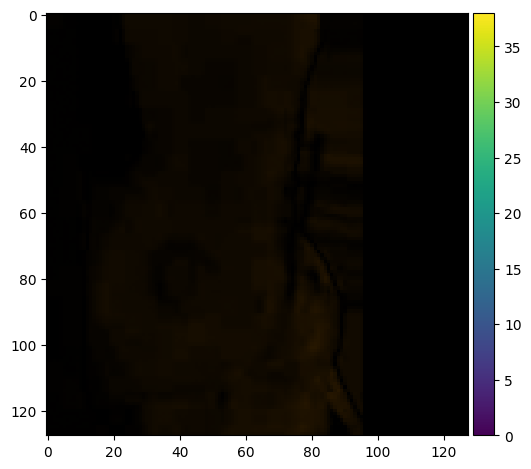

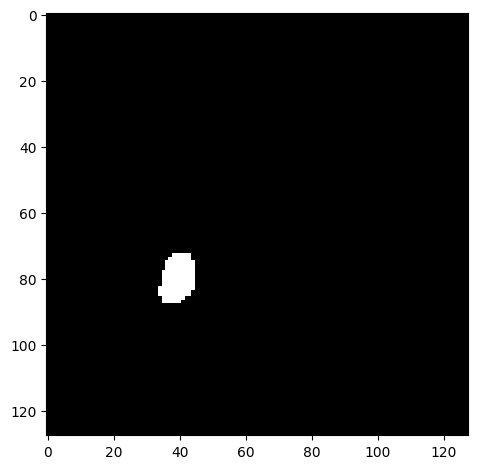

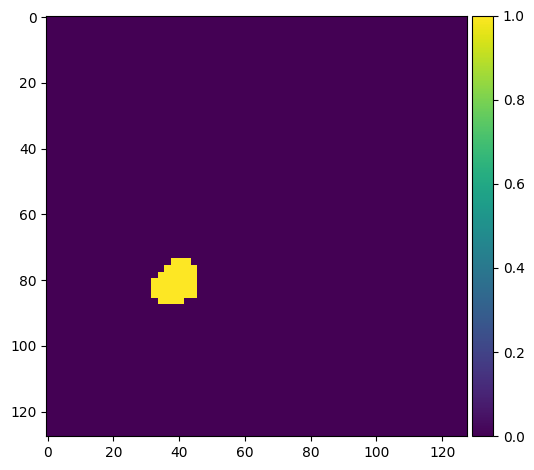

In [136]:
ix = random.randint(0, len(preds_train_t2))
imshow(X_train[ix])
plt.show()
imshow(np.squeeze(Y_train[ix]),)
plt.show()
imshow(np.squeeze(preds_train_t2[ix]))
plt.show()

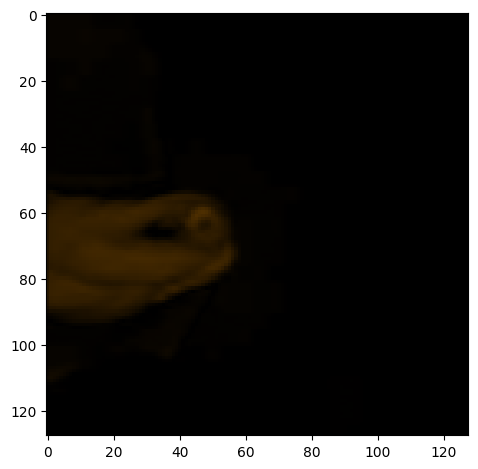

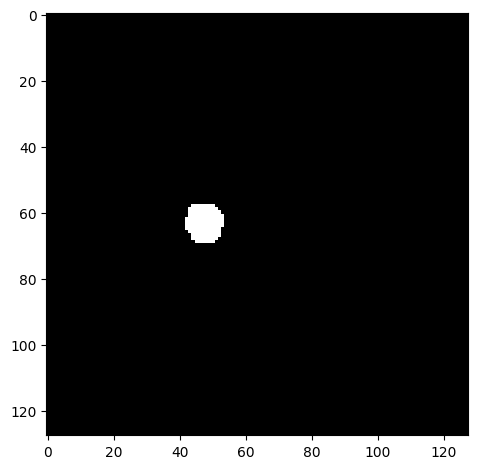

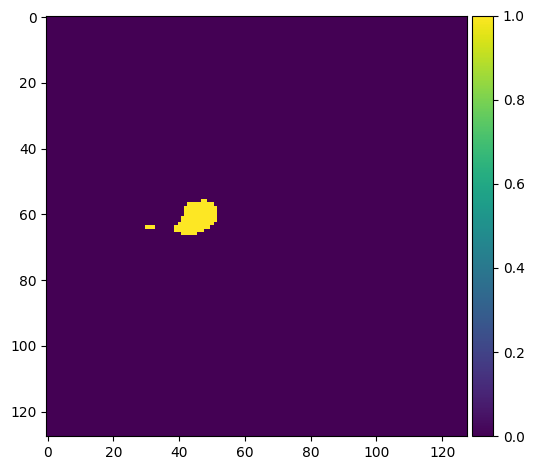

In [137]:
ix = random.randint(0, len(preds_test_t))
imshow(X_test[ix])
plt.show()
imshow(np.squeeze(Y_test[ix]))
plt.show()
imshow(np.squeeze(preds_test_t[ix]))
plt.show()

Acuuracy and Loss graphs for Segnet model

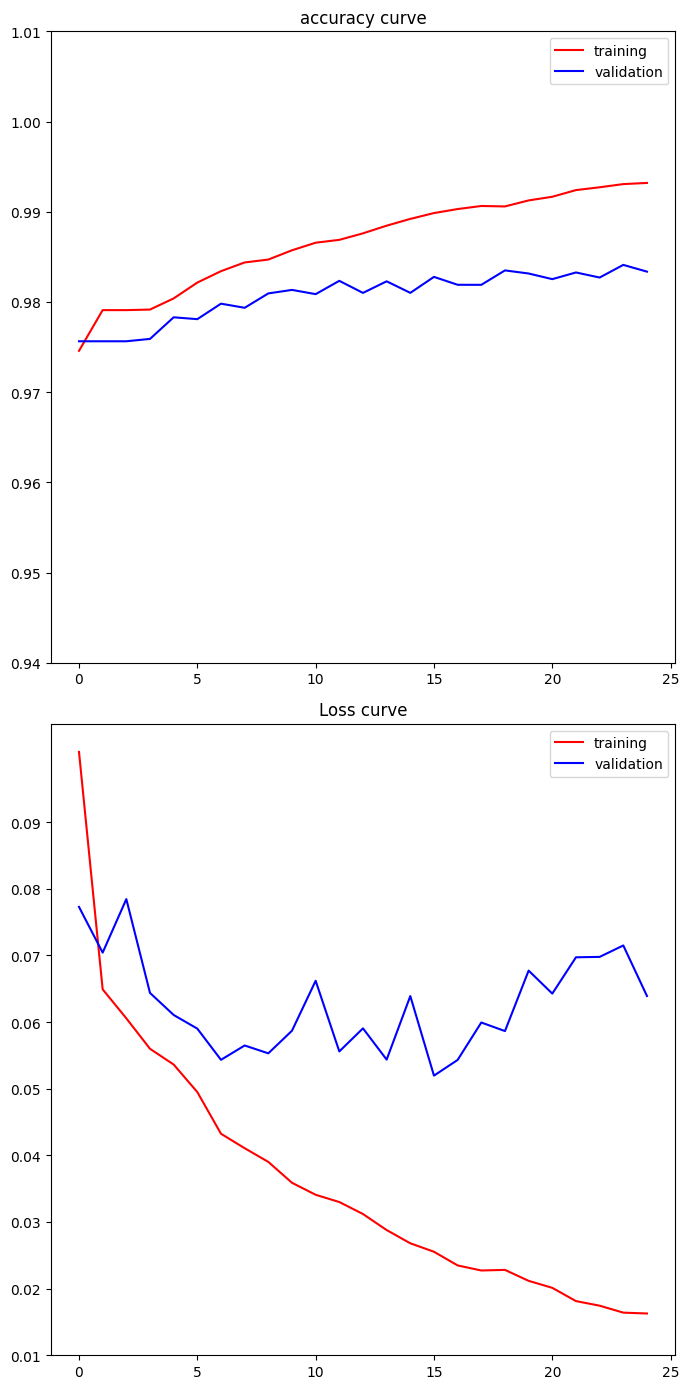

In [59]:
fig, ax = plt.subplots(2,1, figsize=(7, 14))

ax[0].plot(history2.history['accuracy'], 'r')
ax[0].plot(history2.history['val_accuracy'], 'b')
ax[0].set_title('accuracy curve')
ax[0].legend(['training', 'validation'])
ax[0].set_yticks(np.arange(0.94, 1.01, 0.01))
ax[1].plot(history2.history['loss'], 'r')
ax[1].plot(history2.history['val_loss'], 'b')
ax[1].set_title('Loss curve')
ax[1].legend(['training', 'validation'])
ax[1].set_yticks(np.arange(0.01, 0.1, 0.01))
fig.tight_layout()

# plt.show()

In [73]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D, Input, concatenate
from tensorflow.keras.models import Model


Unet model

In [74]:
def fcn_model(input_shape=(128, 128, 3)):
    inputs = Input(shape=input_shape)
    
    # Contracting path (encoder)
    c1 = Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    p1 = MaxPooling2D((2, 2))(c1)

    c2 = Conv2D(128, (3, 3), activation='relu', padding='same')(p1)
    p2 = MaxPooling2D((2, 2))(c2)

    c3 = Conv2D(256, (3, 3), activation='relu', padding='same')(p2)
    p3 = MaxPooling2D((2, 2))(c3)

    c4 = Conv2D(512, (3, 3), activation='relu', padding='same')(p3)
    p4 = MaxPooling2D((2, 2))(c4)

    # Bottleneck
    c5 = Conv2D(1024, (3, 3), activation='relu', padding='same')(p4)

    # Expansive path (decoder)
    u6 = UpSampling2D((2, 2))(c5)
    u6 = concatenate([u6, c4])
    c6 = Conv2D(512, (3, 3), activation='relu', padding='same')(u6)

    u7 = UpSampling2D((2, 2))(c6)
    u7 = concatenate([u7, c3])
    c7 = Conv2D(256, (3, 3), activation='relu', padding='same')(u7)

    u8 = UpSampling2D((2, 2))(c7)
    u8 = concatenate([u8, c2])
    c8 = Conv2D(128, (3, 3), activation='relu', padding='same')(u8)

    u9 = UpSampling2D((2, 2))(c8)
    u9 = concatenate([u9, c1])
    c9 = Conv2D(64, (3, 3), activation='relu', padding='same')(u9)

    outputs = Conv2D(1, (1, 1), activation='sigmoid')(c9)
    
    model = Model(inputs=[inputs], outputs=[outputs])
    return model


In [75]:
model3 = fcn_model()
model3.compile(optimizer='adam', loss=combined_loss, metrics=['accuracy'])
model3.summary()


Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_47 (Conv2D)  │ (None, 128, 128,  │      1,792 │ input_layer_3[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_12    │ (None, 64, 64,    │          0 │ conv2d_47[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_48 (Conv2D)  │ (None, 64, 64,    │     73,856 │ max_pooling2d_12… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_13    │ (None, 32, 32,    │          0 │ conv2d_48[0][0]   │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_49 (Conv2D)  │ (None, 32, 32,    │    295,168 │ max_pooling2d_13… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_14    │ (None, 16, 16,    │          0 │ conv2d_49[0][0]   │
│ (MaxPooling2D)      │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_50 (Conv2D)  │ (None, 16, 16,    │  1,180,160 │ max_pooling2d_14… │
│                     │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_15    │ (None, 8, 8, 512) │          0 │ conv2d_50[0][0]   │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_51 (Conv2D)  │ (None, 8, 8,      │  4,719,616 │ max_pooling2d_15… │
│                     │ 1024)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ up_sampling2d_4     │ (None, 16, 16,    │          0 │ conv2d_51[0][0]   │
│ (UpSampling2D)      │ 1024)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_8       │ (None, 16, 16,    │          0 │ up_sampling2d_4[… │
│ (Concatenate)       │ 1536)             │            │ conv2d_50[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_52 (Conv2D)  │ (None, 16, 16,    │  7,078,400 │ concatenate_8[0]… │
│                     │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ up_sampling2d_5     │ (None, 32, 32,    │          0 │ conv2d_52[0][0]   │
│ (UpSampling2D)      │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_9       │ (None, 32, 32,    │          0 │ up_sampling2d_5[… │
│ (Concatenate)       │ 768)              │            │ conv2d_49[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_53 (Conv2D)  │ (None, 32, 32,    │  1,769,728 │ concatenate_9[0]… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ up_sampling2d_6     │ (None, 64, 64,    │          0 │ conv2d_53[0][0] 

 Total params: 15,671,937 (59.78 MB)

 Trainable params: 15,671,937 (59.78 MB)

 Non-trainable params: 0 (0.00 B)

In [76]:


history3 = model3.fit(X_train, Y_train, validation_split=0.1, batch_size=16, epochs=25)


Epoch 1/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 266s 6s/step - accuracy: 0.9103 - loss: 2.6090 - val_accuracy: 0.9406 - val_loss: 0.7904
Epoch 2/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 243s 5s/step - accuracy: 0.9775 - loss: 0.6153 - val_accuracy: 0.9822 - val_loss: 0.5441
Epoch 3/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 313s 7s/step - accuracy: 0.9816 - loss: 0.5054 - val_accuracy: 0.9832 - val_loss: 0.4487
Epoch 4/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 277s 6s/step - accuracy: 0.9871 - loss: 0.3909 - val_accuracy: 0.9767 - val_loss: 0.4955
Epoch 5/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 335s 7s/step - accuracy: 0.9864 - loss: 0.4102 - val_accuracy: 0.9840 - val_loss: 0.4159
Epoch 6/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 339s 7s/step - accuracy: 0.9875 - loss: 0.3771 - val_accuracy: 0.9811 - val_loss: 0.4377
Epoch 7/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 283s 6s/step - accuracy: 0.9878 - loss: 0.3391 - val_accuracy: 0.9860 - val_loss: 0.3906
Epoch 8/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 199s 4s/step - accuracy: 0.9904 - loss: 0.2795 - val_accuracy: 0.9841 - v

In [85]:
idx3 = random.randint(0, len(X_train))


preds_train3 = model3.predict(X_train, verbose=1)
preds_val3 = model3.predict(X_train[int(X_train.shape[0]*0.9):], verbose=1)
preds_test3= model3.predict(X_test, verbose=1)

 
preds_train_t3 = (preds_train3 > 0.5).astype(np.uint8)
preds_val_t3 = (preds_val3 > 0.5).astype(np.uint8)
preds_test_t3 = (preds_test3 > 0.5).astype(np.uint8)


26/26 ━━━━━━━━━━━━━━━━━━━━ 94s 4s/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 3s/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 25s 3s/step


In [78]:
from sklearn.metrics import accuracy_score

In [86]:
accuracy = accuracy_score(Y_train.flatten(), preds_train_t3.flatten())
print(f'Accuracy: {accuracy}')

# Calculate loss (using Binary Cross-Entropy for example)
loss_fn = tf.keras.losses.BinaryCrossentropy()
loss = loss_fn(Y_train, preds_train3).numpy()
print(f'Loss: {loss}')

Accuracy: 0.9966294276861497
Loss: 0.018942486494779587


In [138]:
model3.save('model3.h5')

In [ ]:
loaded_model3 = tf.keras.models.load_model('model3.h5')


In [88]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score
import tensorflow as tf



# Flatten the arrays for metric calculations
y_val_flat = Y_train.flatten()
y_pred_flat = preds_train_t3.flatten()

precision = precision_score(y_val_flat, y_pred_flat)
recall = recall_score(y_val_flat, y_pred_flat)
iou = np.sum(np.logical_and(y_val_flat, y_pred_flat)) / np.sum(np.logical_or(y_val_flat, y_pred_flat))
dice = f1_score(y_val_flat, y_pred_flat)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"IoU: {iou}")
print(f"Dice Score: {dice}")


Precision: 0.935763238502391
Recall: 0.9034092722276394
IoU: 0.850655225948617
Dice Score: 0.91930167653198


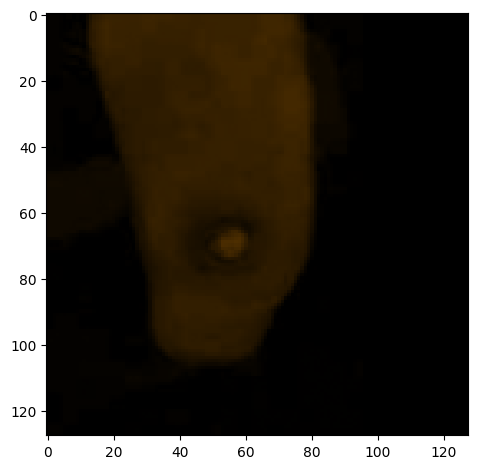

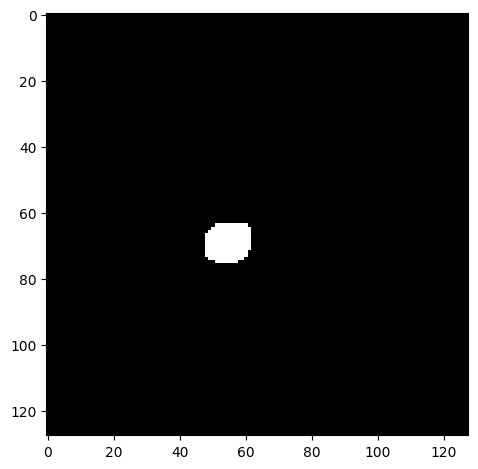

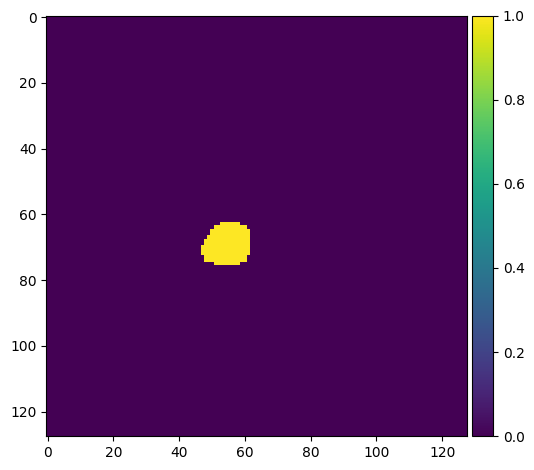

In [117]:
ix = random.randint(0, len(preds_test_t3))
imshow(X_train[218])
plt.show()
imshow(np.squeeze(Y_train[218]))
plt.show()
imshow(np.squeeze(preds_train_t3[218]))
plt.show()

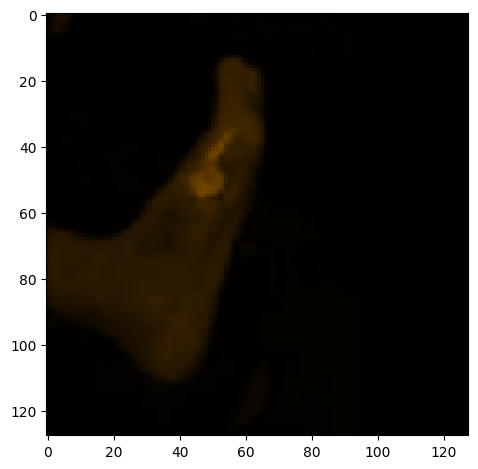

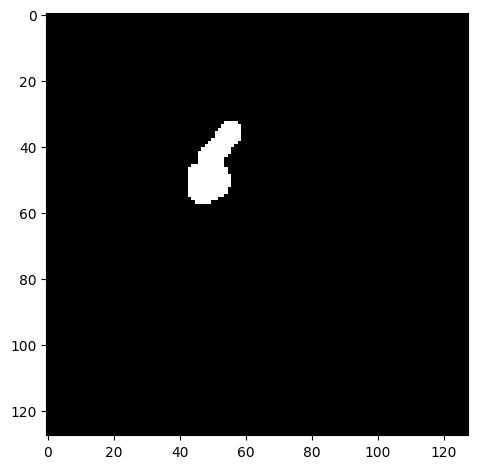

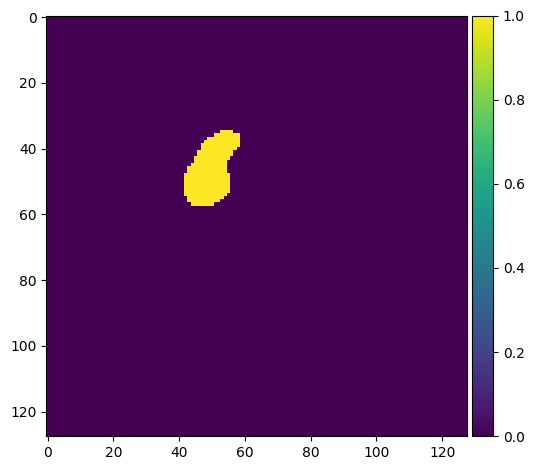

In [90]:
ix = random.randint(0, len(preds_test_t3))
imshow(X_test[ix])
plt.show()
imshow(np.squeeze(Y_test[ix]))
plt.show()
imshow(np.squeeze(preds_test_t3[ix]))
plt.show()

Acuuracy and Loss graphs for Unet model

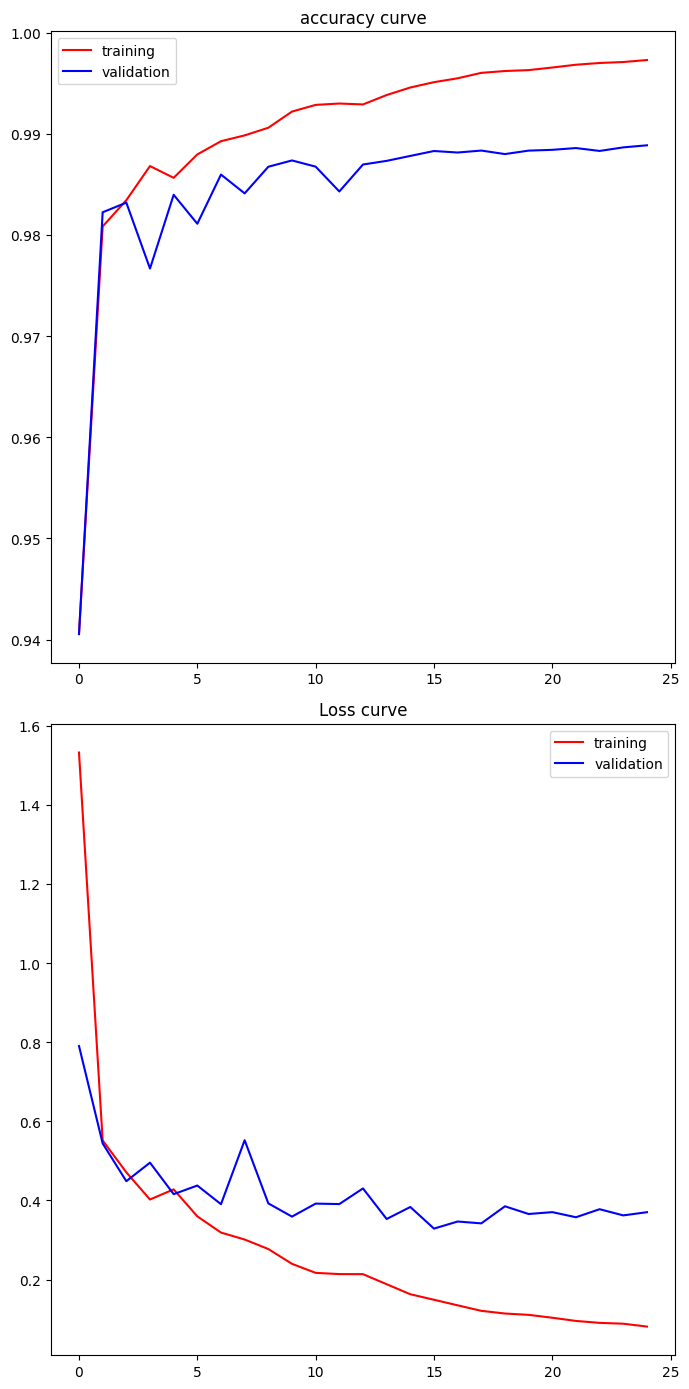

In [110]:
fig, ax = plt.subplots(2,1, figsize=(7, 14))

ax[0].plot(history3.history['accuracy'], 'r')
ax[0].plot(history3.history['val_accuracy'], 'b')
ax[0].set_title('accuracy curve')
ax[0].legend(['training', 'validation'])

ax[1].plot(history3.history['loss'], 'r')
ax[1].plot(history3.history['val_loss'], 'b')
ax[1].set_title('Loss curve')
ax[1].legend(['training', 'validation'])

fig.tight_layout()

# plt.show()

Enesmble method starts here

In [93]:
unet=preds_train
seg_out=preds_train2
dep=preds_train3

In [95]:
#calculating the average of all the three models
ensemble_output = (seg_out + dep + unet) /3.0

In [96]:
ensemb_out= (ensemble_output > 0.5).astype(np.uint8) 

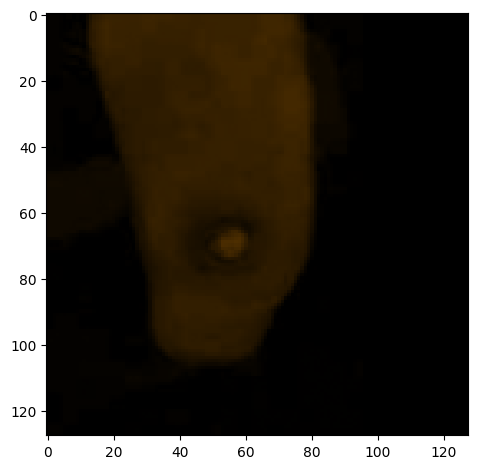

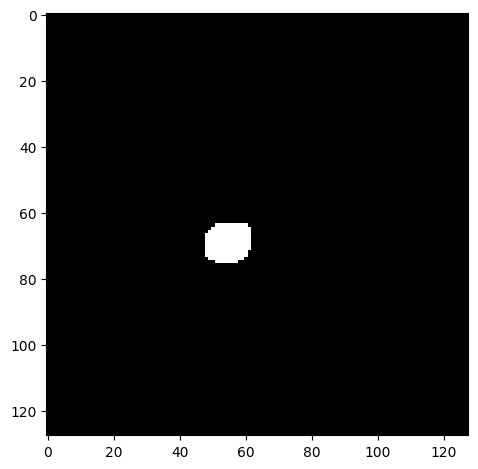

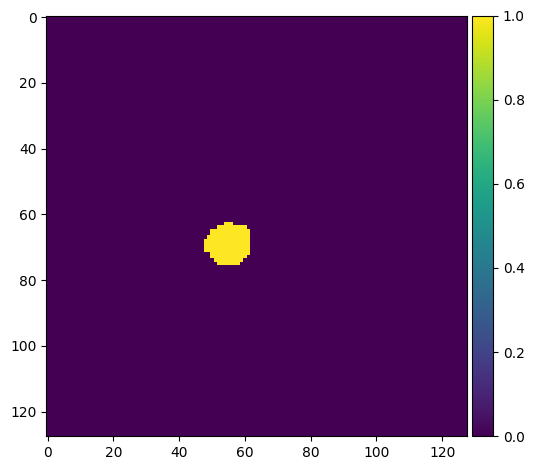

In [120]:
imshow(np.squeeze(X_train[218]))
plt.show()
imshow(np.squeeze(Y_train[218]))
plt.show()
imshow(np.squeeze(ensemb_out[218]))
plt.show()

In [108]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score
import tensorflow as tf

y_pred = ensemb_out
y_pred_binary = (y_pred > 0.5).astype(np.uint8)

# Flatten the arrays for metric calculations
y_val_flat = Y_train.flatten()
y_pred_flat = y_pred_binary.flatten()

precision = precision_score(y_val_flat, y_pred_flat)
recall = recall_score(y_val_flat, y_pred_flat)
intersection = np.sum(np.logical_and(y_val_flat, y_pred_flat))
union = np.sum(np.logical_or(y_val_flat, y_pred_flat))
iou = intersection / union if union != 0 else 0
intersection = np.sum((y_val_flat == 1) & (y_pred_flat == 1))
dice = (2. * intersection) / (np.sum(y_val_flat) + np.sum(y_pred_flat))

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"IoU: {iou}")
print(f"Dice Score: {dice}")

Precision: 0.9345658280527686
Recall: 0.8623455367431965
IoU: 0.8132438062818297
Dice Score: 0.8970043669410758


In [100]:
#confusion matric is calculated
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
# Flatten true labels and predicted labels
true_labels_flat = Y_train.ravel()
predicted_labels_flat = ensemb_out.ravel()


confusion_matrix = confusion_matrix(true_labels_flat, predicted_labels_flat)


print(confusion_matrix)


[[12971987    17028]
 [   38822   243203]]


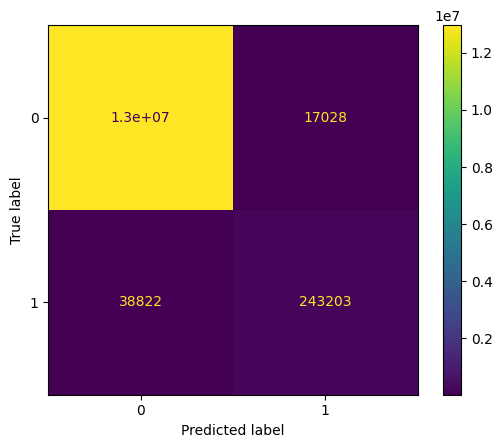

In [101]:
#dicplay of confusion matrix
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

cm_display.plot()
plt.show()

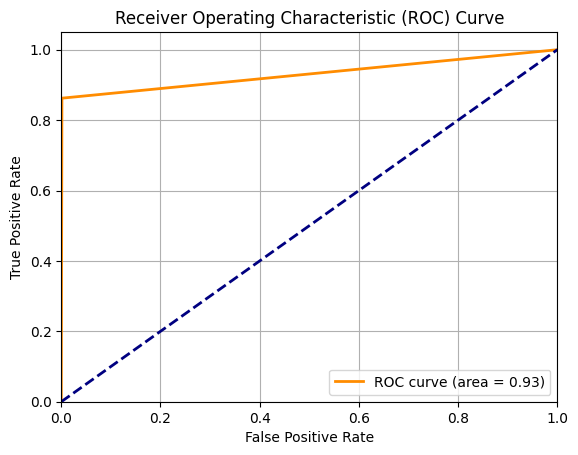

In [109]:
#construction of ROC graph for ensemble output
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

def compute_roc_curve(gt_masks, pred_masks):

    # Flatten the masks
    gt_flat = np.concatenate([mask.flatten() for mask in gt_masks])
    pred_flat = np.concatenate([mask.flatten() for mask in pred_masks])

    # Compute ROC curve
    fpr, tpr, _ = roc_curve(gt_flat, pred_flat)
    roc_auc = auc(fpr, tpr)

    return fpr, tpr, roc_auc

def plot_roc_curve(fpr, tpr, roc_auc):

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

fpr, tpr, roc_auc = compute_roc_curve(Y_train, ensemb_out)
plot_roc_curve(fpr, tpr, roc_auc)
